## Importing Libraries

In [1]:
import pandas as pd
import fast_ml
from sklearn.preprocessing  import OneHotEncoder
from fast_ml import eda
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
import math
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import hydroeval as he
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

## Data Preparation

In [2]:
filepath='PROJECT DATA.xlsx'
df=pd.read_excel(filepath,engine='openpyxl') #without engine='openpyxl', I was unable to read the excel file)
df.head(5)

,LOCATION,V25,V85,V90,PW,SW,MW,RA
0,1,20.0,80.0,96.66,7.41,2.5,0.46,No
1,2,20.0,80.0,96.66,7.41,2.5,0.46,No
2,3,20.0,80.0,96.66,7.41,2.5,0.46,No
3,4,20.0,80.0,96.66,7.41,2.5,0.46,No
4,5,20.0,80.0,96.66,7.41,2.5,0.46,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   40 non-null     int64  
 1   V25        40 non-null     float64
 2   V85        40 non-null     float64
 3   V90        40 non-null     float64
 4   PW         40 non-null     float64
 5   SW         40 non-null     float64
 6   MW         40 non-null     float64
 7   RA         40 non-null     object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.6+ KB


In [4]:
df.describe()

,LOCATION,V25,V85,V90,PW,SW,MW
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01
mean,20.500000,21.667500,82.501250,96.666250,7.540000,2.478750,4.600000e-01
std,11.690452,2.924988,3.270237,0.004903,0.161722,0.239842,4.829544e-16
min,1.000000,20.000000,80.000000,96.660000,7.410000,2.100000,4.600000e-01
25%,10.750000,20.000000,80.000000,96.660000,7.410000,2.400000,4.600000e-01
50%,20.500000,20.000000,80.000000,96.670000,7.490000,2.500000,4.600000e-01
75%,30.250000,21.667500,86.670000,96.670000,7.570000,2.710000,4.600000e-01
max,40.000000,26.670000,86.670000,96.670000,7.810000,2.710000,4.600000e-01


In [5]:
corr=df[['LOCATION ','V25','V85','V90','PW ','SW','MW']].corr()
corr

,LOCATION,V25,V85,V90,PW,SW,MW
LOCATION,1.000000,0.750234,0.167758,0.838788,0.854431,-0.476678,0.810655
V25,0.750234,1.000000,-0.447214,0.447214,0.976187,-0.923347,0.415590
V85,0.167758,-0.447214,1.000000,0.600000,-0.242536,0.756363,0.557573
V90,0.838788,0.447214,0.600000,1.000000,0.630593,-0.069504,0.929288
PW,0.854431,0.976187,-0.242536,0.630593,1.000000,-0.818066,0.586002
SW,-0.476678,-0.923347,0.756363,-0.069504,-0.818066,1.000000,-0.064589
MW,0.810655,0.415590,0.557573,0.929288,0.586002,-0.064589,1.000000


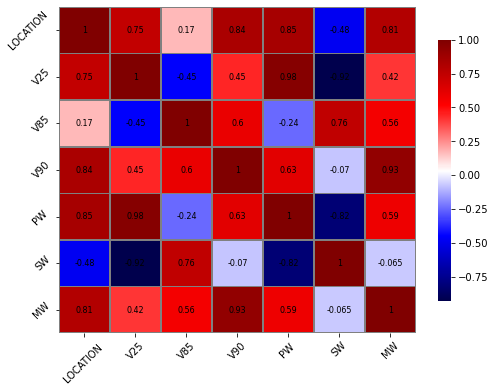

In [6]:

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr,
                      cmap='seismic', 
                      linewidth=0.75,
                      linecolor='gray',
                      cbar_kws={"shrink": .8},
                      annot=True,
                      annot_kws={'size': 8, 'color': 'black'})

heatmap.tick_params(labelsize=10, rotation=45)

## Split Data into Training and Testing Sets

In [7]:
# Drop the 'LOCATION' column, i.e Location, V25, and V90 were removed from the dataframe before training and 
#testing of the model.
columns=['LOCATION ', 'V25','V90']
df = df.drop(columns=columns)

In [8]:
import sklearn; print(sklearn.__version__)

0.24.2


In [9]:
encoder = OneHotEncoder(drop='first',sparse=False) #Replaced "Sparse_output", with "sparse"
encoded_RA = encoder.fit_transform(df[['RA']])
encoded_df=pd.DataFrame(encoded_RA)
df['RA']=encoded_df.astype('int')
df.head(5)

,V85,PW,SW,MW,RA
0,80.0,7.41,2.5,0.46,0
1,80.0,7.41,2.5,0.46,0
2,80.0,7.41,2.5,0.46,0
3,80.0,7.41,2.5,0.46,0
4,80.0,7.41,2.5,0.46,0


In [10]:
df['RA'].value_counts()

0    37
1     3
Name: RA, dtype: int64

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# features to scale 
numeric_features = ['V85', 'MW', 'SW', 'MW']

# Fit and transform the selected numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])
print(df.head(5))

        V85   PW         SW        MW  RA
0 -0.774597  7.41  0.089729 -1.396861   0
1 -0.774597  7.41  0.089729 -1.396861   0
2 -0.774597  7.41  0.089729 -1.396861   0
3 -0.774597  7.41  0.089729 -1.396861   0
4 -0.774597  7.41  0.089729 -1.396861   0


In [12]:
#Seperating into feature and target variable
target='V85'
y=df[target]
X=df.drop(columns=target)

In [13]:
#Splitting into train and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 4)
(32,)
(8, 4)
(8,)


In [14]:
data_dir = "data"  
# Construct file paths using os.path.join
X_train_path = os.path.join(data_dir, "X_train.csv")
X_test_path = os.path.join(data_dir, "X_test.csv")
y_train_path = os.path.join(data_dir, "y_train.csv")
y_test_path = os.path.join(data_dir, "y_test.csv")

# Save the datasets using the constructed paths
X_train.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

In [15]:
# Read the CSV files using the constructed paths
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 4)
(32,)
(8, 4)
(8,)


## Model Creation (XGBOOST)

In [17]:
# Initialize and train the GradientBoostingRegressor model
GBM = GradientBoostingRegressor(n_estimators=20) 
GBM.fit(X_train, y_train)  # Train the model

# Predictions for the train set
train_pred = GBM.predict(X_train)

print('Prediction for train set')
print('MAE is', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the test set
test_pred = GBM.predict(X_test)

print('Prediction for test set')
print('MAE is', metrics.mean_absolute_error(y_test, test_pred))
print('MSE is', metrics.mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))


Prediction for train set
MAE is 0.1079064154934532
MSE is 0.013549142696315067
RMSE is 0.11640078477534017
R_Sqd is 0.9852191170585654
Cor is 0.9925820455048365

Prediction for test set
MAE is 0.13733543790075864
MSE is 0.020939584167032378
RMSE is 0.14470516289003782
R_Sqd is 0.9790604158329677
Cor is 0.9894748181904215
